In [1]:
# Shiyi (Amy) Qin and Victor Z
# UW-Madison, 2024
# illustrate convolutions with different filters

## Start here if working on google collab

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.signal.windows import gaussian

In [7]:
# Create rectangular pulse signal
N = 20
w = np.ones(N)
N2 = 40
f = np.concatenate([np.zeros(N2), w, np.zeros(N2)])
Nt = len(f)
t = np.arange(Nt)

# Define a moving average filter
wg = w / N
gu = np.concatenate([np.zeros(N2), wg, np.zeros(N2)])

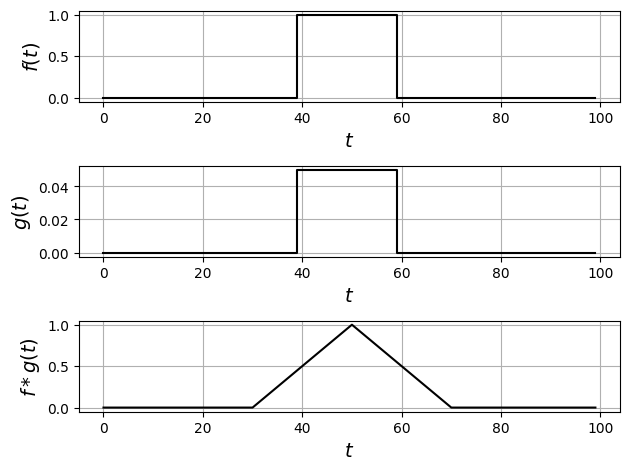

In [8]:
# Visualize signal and filter
plt.figure()
plt.subplot(3, 1, 1)
plt.step(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 2)
plt.step(t, gu, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

# Apply convolution
phi = convolve(f, wg, mode='same')
plt.subplot(3, 1, 3)
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.tight_layout()


In [9]:
# Check area under curve
area = np.trapz(phi)
print(f"Area under curve: {area}")

Area under curve: 20.0


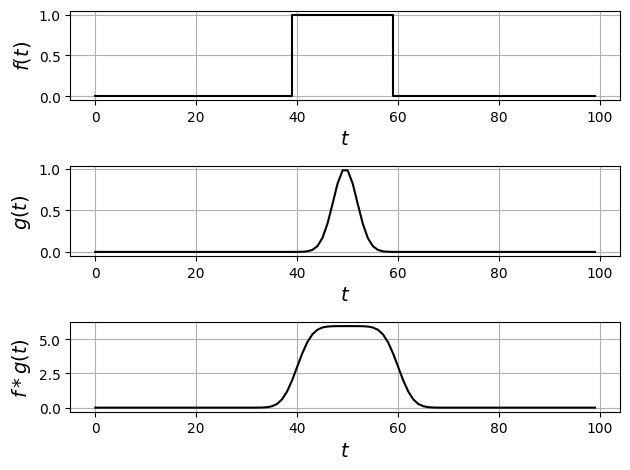

In [10]:
# Gauss filter
alpha = 4
N = 20
wg = gaussian(N, std=(N-1)/(2*alpha))
gg = np.concatenate([np.zeros(N2), wg, np.zeros(N2)])

plt.figure()
# Visualize signal and filter
plt.subplot(3, 1, 1)
plt.step(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 2)
plt.plot(t, gg, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

# Apply convolution
phi = convolve(f, gg, mode='same')
plt.subplot(3, 1, 3)
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.tight_layout()

In [11]:
# Check area under curve
area = np.trapz(phi)
print(f"Area under curve: {area}")

Area under curve: 119.06219690207706


In [12]:
# Apply moving average filter to a noisy signal
L = 500
Fs = 1000  # Hz (sampling frequency)
T = 1 / Fs  # sec (sampling period)
t = np.arange(0, L) * T  # time vector
f1 = np.sin(2 * np.pi * 30 * t)
f2 = np.sin(2 * np.pi * 60 * t)
f = f1 + f2
np.random.seed(0)
f = f + np.random.normal(0, 1, L)

wg = np.ones(4) / 4

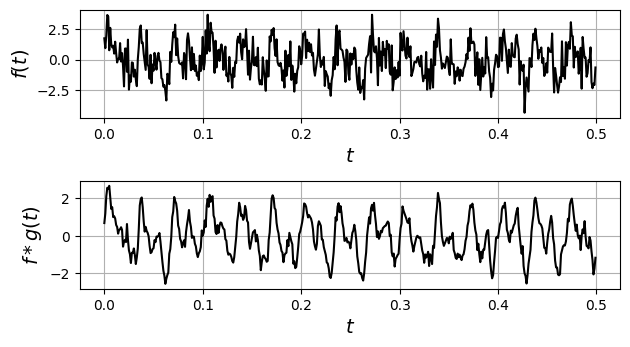

In [13]:
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 2)
phi = convolve(f, wg, mode='same')
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.tight_layout()

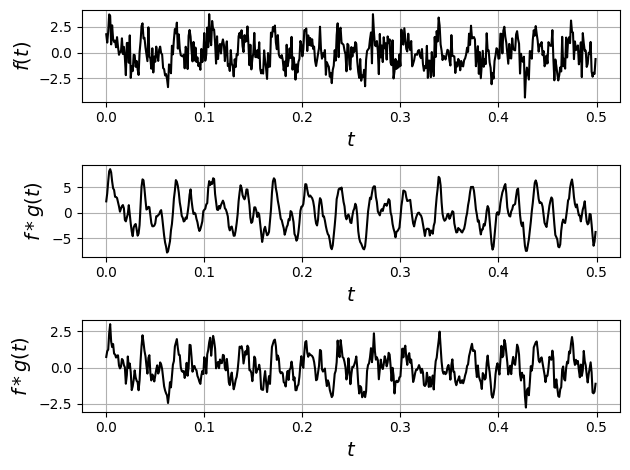

In [14]:
# Apply Gaussian filter to a noisy signal
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(t, f, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 2)
N = 4
alpha = 1
wg = gaussian(N, std=(N-1)/(2*alpha))
phi = convolve(f, wg, mode='same')
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.subplot(3, 1, 3)
alpha = 4
wg = gaussian(N, std=(N-1)/(2*alpha))
phi = convolve(f, wg, mode='same')
plt.plot(t, phi, 'k', linewidth=1.5)
plt.grid(True)
plt.ylabel('$f*g(t)$', fontsize=14)
plt.xlabel('$t$', fontsize=14)

plt.tight_layout()
plt.show()